<a href="https://colab.research.google.com/github/gillesvtsilvano/IA-PPGEEC-Winter_Course/blob/master/LiveCam_Selenium_YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LiveCam, Selenium and YOLOv3 (Darknet)

Description: <mark>TODO</mark>

# Getting Images from a LiveCam with Selenium

## Setting up Selenium and Cromedriver



In [0]:
!pip install selenium
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (75.0.3770.90-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.


## Importing Libs and instantiate Chromedriver

In [0]:
import sys
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options 
from selenium.webdriver.common.action_chains import ActionChains
from PIL import Image
from io import BytesIO

# Headless Google Chrome
chrome_options = Options()  
chrome_options.add_argument("--headless")
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Bug: after add to path, still need to pass as an argument to Chrome()
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

driver = webdriver.Chrome(executable_path='/usr/lib/chromium-browser/chromedriver', options=chrome_options)

## Accessing the web page

In [0]:
url="http://sttu.gtrans.com.br/"
driver.get(url)

## Clicking on 'add video' button

In [0]:
add_video_btn = driver.find_element_by_xpath('//*[@id="v1"]/div/div/a')
add_video_btn.click()
# TODO: remove css/js animations instead of wait for them. Maybe https://stackoverflow.com/questions/11131875/what-is-the-cleanest-way-to-disable-css-transition-effects-temporarily
sleep(2) # Wait elements to load

## Selecting Prudente de Morais by executing onclick script

In [0]:
# Find a morelegant way to select the video
# Maybe just call .click()?
target_video = driver.find_element_by_xpath('//*[@id="modal-cameras"]/div/div/div[2]/div/div[2]/div/a')
click_action = target_video.get_attribute('onclick')
driver.execute_script(click_action)
sleep(2) # Wait

## Hiding video UI elements

In [0]:
video_embedded_el = driver.find_element_by_id('video_v1_1')
js_snippet = "attr = arguments[0].attributes.getNamedItem('class'); attr.value=arguments[1]; arguments[0].attributes.setNamedItem(attr)";
new_class_attrs = 'flowplayer fp-default-playlist is-live is-ready is-live-position is-playing is-mouseout'
driver.execute_script(js_snippet, video_embedded_el, new_class_attrs)

## Getting rid of the caption black rectangle

In [0]:
video_caption = driver.find_element_by_xpath('//*[@id="v1"]/div/div/div[2]')
driver.execute_script('arguments[0].style.visibility = "hidden";', video_caption)

## Getting an screenshot of the video

In [0]:
video = driver.find_element_by_id('v1')
sleep(2)
png = video.screenshot_as_png
im = Image.open(BytesIO(png))

## Croping image and save it as 'ss.png'

In [0]:
width,height = im.size
crop = im.crop((86, 0, width-86, height))
crop.save('ss.png')

## Showing final image for 'visual' results

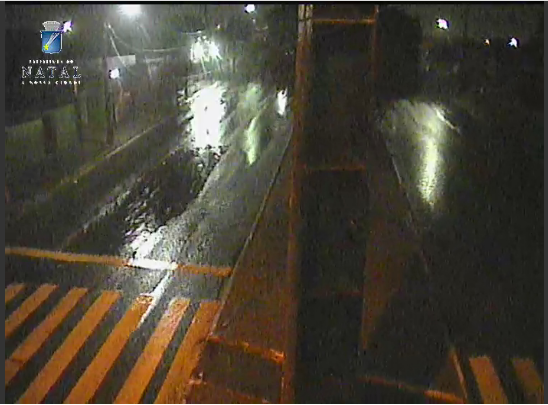

In [0]:
from IPython.display import Image as iImage

iImage(filename='ss.png')

## Create a loop to get an image per second (think more about this)

# Creating the dataset with LabelImg

- https://github.com/tzutalin/labelImg
- https://towardsdatascience.com/yolov2-to-detect-your-own-objects-soccer-ball-using-darkflow-a4f98d5ce5bf